<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/example_make_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import os.path
import requests
from numpy import genfromtxt
from sklearn.datasets import make_moons, make_circles, make_classification, make_gaussian_quantiles
import pandas as pd
!mkdir data #let us create data folder to hold our data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [4]:
X, y = make_classification(n_samples=1000, n_features=5, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=1)
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.686468,-1.271874,-0.254311,1.544239,1.202059
1,0.509081,-0.216813,-0.831148,-0.457612,0.333293
2,1.736607,-1.376652,-0.762185,-1.054598,1.070726
3,0.884990,0.065417,-0.397411,-1.020738,0.706335
4,1.771464,-0.465186,0.011318,1.591621,1.691010


In [5]:
data = X
data_labels = y
file_2d = 'data/classification-2d.txt'

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


classification dataset : Groundtruht


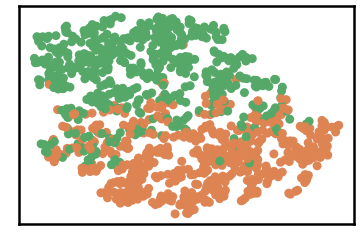



classification dataset : DenMune Clustering


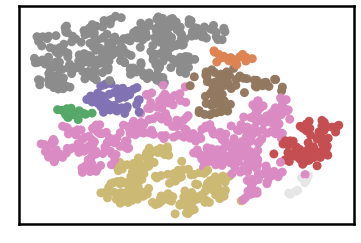

DenMune Analyzer
├── exec_time
│   ├── DenMune: 0.127
│   ├── NGT: 0.016
│   └── t_SNE: 7.32
├── n_clusters
│   ├── actual: 2
│   └── detected: 8
├── n_points
│   ├── dim: 5
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 10
│   ├── size: 1000
│   ├── strong: 562
│   └── weak
│       ├── all: 438
│       ├── failed to merge: 10
│       └── succeeded to merge: 428
└── validity
    ├── ACC: 869
    ├── AMI: 0.471
    ├── ARI: 0.544
    ├── F1: 0.868
    ├── NMI: 0.471
    ├── completeness: 0.476
    └── homogeneity: 0.466

k= 12 F1 score is: 0.868


In [21]:
# Denmune's Paramaters
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_groundtrugh = True  # show plots on/off
show_noise = True # show noise and outlier on/off

knn = 12
dm = DenMune(data=data,  file_2d=file_2d, k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=True )
labels_pred = dm.fit_predict()

if show_groundtrugh:
    # Let us plot the groundtruth of this dataset
    print ("classification dataset", ": Groundtruht")
    dm.plot_clusters(labels=data_labels, ground=True)
    print('\n', "=====" * 20 , '\n')       

# Let us plot the results produced using DenMune
print ("classification dataset", ": DenMune Clustering")
dm.plot_clusters(labels=labels_pred, show_noise=show_noise)

validity = dm.validate_Clusters(labels_true=data_labels, labels_pred=labels_pred)
validity_key = "F1" 
# Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7       
print ('k=' , knn, validity_key , 'score is:', round(validity[validity_key],3))